In [1]:
# Load python modules
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import seaborn as sn
import tensorflow_datasets as tfds
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
from tqdm import tqdm  # Perform iterature with progress bar
import numpy as np
import PIL.Image
import PIL
import cv2
import os


In [2]:
#Class labelsb
class_names = ['Glass', 'Metal', 'Paper', 'Textile']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
image_size = (64, 64)

In [3]:
print('Number of classes:', nb_classes)

Number of classes: 4


In [4]:
def load_data():
    """
        Load the data from local folder
        
    """
    datasets = ['C:/Mani/Dataset/dataset1/train_ds',
               'C:/Mani/Dataset/dataset1/test_ds']
    
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_size) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [5]:
#Prepare dataset for training and testing
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Mani/Dataset/dataset1/train_ds


100%|███████████████████████████████████████████████████████████████████████████████| 270/270 [00:01<00:00, 198.26it/s]


Loading C:/Mani/Dataset/dataset1/test_ds


100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 195.48it/s]


In [6]:
#Check the training and testing image shape
train_images.shape, test_images.shape

((1080, 64, 64, 3), (200, 64, 64, 3))

In [7]:
# Shuffle only the training dataset
np.random.seed(321)
train_images, train_labels = shuffle(train_images, train_labels)

In [8]:
#Check the number of training dataset
print('No of training images:', train_images.shape[0])

No of training images: 1080


In [9]:
#Normalise train and test image dataset from 0,255 to 0,1
train_images = train_images / 255.0 
test_images = test_images / 255.0

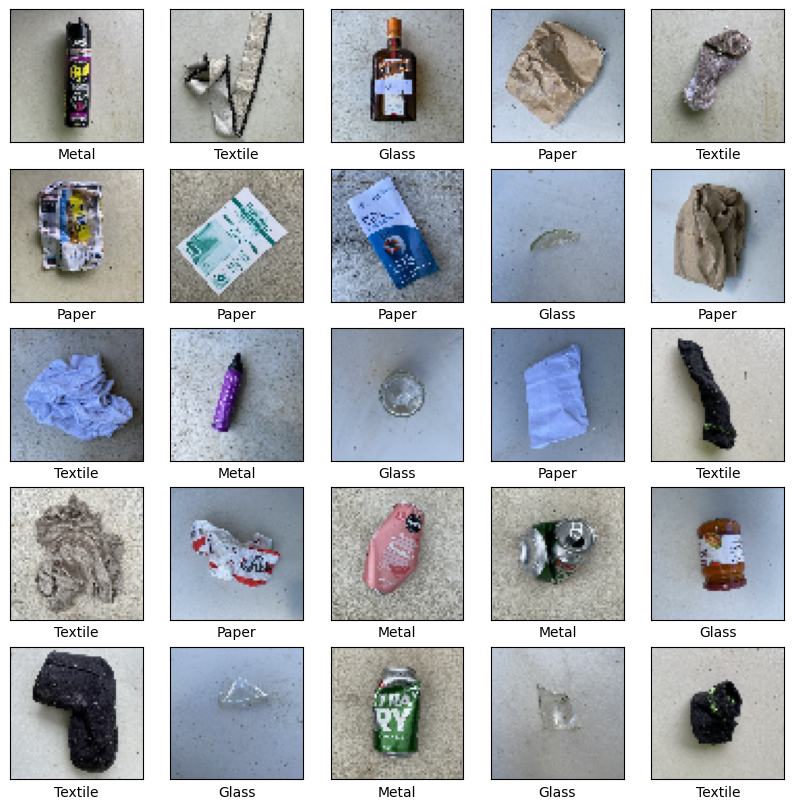

In [10]:
#Display 25 images 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
#Sequential Model 1

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Input((64, 64 ,3)),
    
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')   
])

model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,843,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,863,236 (7.11 MB)

 Trainable params: 1,863,236 (7.11 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#Sequential Model 2 with image size 128, 128, 3

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Input((64,64,3)),
    
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
       
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])

model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 298,756 (1.14 MB)

 Trainable params: 298,756 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#Sequential Model 3 
# Build a deep model 

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Input((64,64,3)),
    
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')      
])

model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 4, 4, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,300 (919.14 KB)

 Trainable params: 235,300 (919.14 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Add callbacks to save the model weight with best accuracy during training
# import ModelCheckpoint package
# from tensorflow.keras.callbacks import ModelCheckpoint
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

checkpoint_filepath1 = 'C:/Mani/ModelCheckpoint/model1.keras'
model_checkpoint_callback1 = ModelCheckpoint(
    filepath=checkpoint_filepath1,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)


checkpoint_filepath2 = 'C:/Mani/ModelCheckpoint/model2.keras'
model_checkpoint_callback2 = ModelCheckpoint(
    filepath=checkpoint_filepath2,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

checkpoint_filepath3 = 'C:/Mani/ModelCheckpoint/model3.keras'
model_checkpoint_callback3 = ModelCheckpoint(
    filepath=checkpoint_filepath3,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)


In [15]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(1e-3),
                loss = 'sparse_categorical_crossentropy', 
                metrics=['accuracy'])


model_2.compile(optimizer = tf.keras.optimizers.Adam(1e-3),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])


model_3.compile(optimizer = tf.keras.optimizers.Adam(1e-3),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
               

In [16]:
# Set number of epochs
epochs = 100
batch_size = 64



In [17]:
#Model 1 training
# Get the current time
start_time = datetime.now()
print('Time model start:', start_time)

history1 = model_1.fit(train_images, train_labels,
                       batch_size=batch_size, epochs=epochs,
                       validation_split = 0.2, verbose=1,
                       callbacks=[model_checkpoint_callback1])

# Get the current time
end_time = datetime.now()
print('Time model end:', end_time) 
print('Model_1_training_time', end_time - start_time )

Time model start: 2024-11-07 11:44:26.000831
Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.2758 - loss: 2.4106
Epoch 1: val_accuracy improved from -inf to 0.29630, saving model to C:/Mani/ModelCheckpoint/model1.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.2755 - loss: 2.3843 - val_accuracy: 0.2963 - val_loss: 1.3831
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.2612 - loss: 1.3820
Epoch 2: val_accuracy did not improve from 0.29630
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.2598 - loss: 1.3824 - val_accuracy: 0.2963 - val_loss: 1.3750
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.2939 - loss: 1.3621
Epoch 3: val_accuracy improved from 0.29630 to 0.45833, saving model to C:/Mani/ModelCheckpoint/model1.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.2976 - loss: 1.3607 - val_accuracy: 0.4583 - val_loss: 1.2805
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.4283 - los

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.9058 - loss: 0.2764 - val_accuracy: 0.7130 - val_loss: 0.6854
Epoch 25/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.9053 - loss: 0.2969
Epoch 25: val_accuracy did not improve from 0.72222
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.9061 - loss: 0.2954 - val_accuracy: 0.7222 - val_loss: 0.7387
Epoch 26/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9038 - loss: 0.2610
Epoch 26: val_accuracy did not improve from 0.72222
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.9036 - loss: 0.2612 - val_accuracy: 0.7037 - val_loss: 0.8058
Epoch 27/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9138 - loss: 0.2524
Epoch 27: val_accuracy improved from 0.72222 to 0.73148, saving model to C:/Mani/ModelCheckpoint/model1.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9138 - loss: 0.2521 - val_accuracy: 0.7315 - val_loss: 0.7383
Epoch 28/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9854 - loss: 0.0455
Epoch 49: val_accuracy did not improve from 0.75463
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.9856 - loss: 0.0454 - val_accuracy: 0.7500 - val_loss: 0.9565
Epoch 50/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9947 - loss: 0.0379
Epoch 50: val_accuracy did not improve from 0.75463
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.9946 - loss: 0.0381 - val_accuracy: 0.7130 - val_loss: 1.0968
Epoch 51/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9809 - loss: 0.0497
Epoch 51: val_accuracy did not improve from 0.75463
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.9813 - loss: 0.0491 - val_accuracy: 0.7130 - val_loss: 1.0621
Epoch 52/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9938 - loss: 0.0344
Epoch 52: val_accuracy did not improve from 0.75463
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.9937 - loss: 0.0346 - val_accuracy: 0.7130 - va

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9963 - loss: 0.0167
Epoch 74: val_accuracy did not improve from 0.75926
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.9963 - loss: 0.0166 - val_accuracy: 0.7361 - val_loss: 1.1564
Epoch 75/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.9994 - loss: 0.0142
Epoch 75: val_accuracy did not improve from 0.75926
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.9994 - loss: 0.0144 - val_accuracy: 0.7407 - val_loss: 1.1217
Epoch 76/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.9984 - loss: 0.0167
Epoch 76: val_accuracy did not improve from 0.75926
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.9983 - loss: 0.0168 - val_accuracy: 0.7176 - val_loss: 1.2505
Epoch 77/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.9973 - loss: 0.0204
Epoch 77: val_accuracy did not improve from 0.75926
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.9971 - loss: 0.0207 - val_accuracy: 0.7315 - va

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.9888 - loss: 0.0303
Epoch 99: val_accuracy did not improve from 0.76389
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.9887 - loss: 0.0306 - val_accuracy: 0.7222 - val_loss: 1.4130
Epoch 100/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.9962 - loss: 0.0215
Epoch 100: val_accuracy did not improve from 0.76389
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.9961 - loss: 0.0213 - val_accuracy: 0.7361 - val_loss: 1.2803
Time model end: 2024-11-07 11:47:27.253453
Model_1_training_time 0:03:01.252622


In [18]:
# Model 2 training
# Get the current time
start_time = datetime.now()
print('Time model start:', start_time)


history2 = model_2.fit(train_images, train_labels,
                       batch_size=batch_size, epochs= epochs, 
                       validation_split = 0.2, verbose=1,
                        callbacks=[model_checkpoint_callback2])

# Get the current time
end_time = datetime.now()
print('Time model end:', end_time) 
print('Model_2_training_time', end_time - start_time )

Time model start: 2024-11-07 11:47:27.260490
Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.2532 - loss: 1.4295
Epoch 1: val_accuracy improved from -inf to 0.29167, saving model to C:/Mani/ModelCheckpoint/model2.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.2524 - loss: 1.4280 - val_accuracy: 0.2917 - val_loss: 1.3828
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.2804 - loss: 1.3830
Epoch 2: val_accuracy did not improve from 0.29167
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.2819 - loss: 1.3827 - val_accuracy: 0.2361 - val_loss: 1.3729
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.3189 - loss: 1.3619
Epoch 3: val_accuracy improved from 0.29167 to 0.31481, saving model to C:/Mani/ModelCheckpoint/model2.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 0.3192 - loss: 1.3608 - val_accuracy: 0.3148 - val_loss: 1.3460
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.3389 - los

Epoch 24/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.8185 - loss: 0.4690
Epoch 24: val_accuracy did not improve from 0.76389
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.8192 - loss: 0.4680 - val_accuracy: 0.7269 - val_loss: 0.6671
Epoch 25/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.8487 - loss: 0.4044
Epoch 25: val_accuracy improved from 0.76389 to 0.79167, saving model to C:/Mani/ModelCheckpoint/model2.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.8477 - loss: 0.4052 - val_accuracy: 0.7917 - val_loss: 0.5692
Epoch 26/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.8695 - loss: 0.3496
Epoch 26: val_accuracy did not improve from 0.79167
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.8693 - loss: 0.3498 - val_accuracy: 0.7870 - val_loss: 0.5183
Epoch 27/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.8893 - loss: 0.3070
Epoch 27: val_accuracy improved from 0.79167 to 0.81019, saving model to C:/Mani/Mo

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9624 - loss: 0.1180
Epoch 48: val_accuracy did not improve from 0.83333
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.9625 - loss: 0.1175 - val_accuracy: 0.7778 - val_loss: 0.5978
Epoch 49/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9546 - loss: 0.1192
Epoch 49: val_accuracy improved from 0.83333 to 0.83796, saving model to C:/Mani/ModelCheckpoint/model2.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.9550 - loss: 0.1182 - val_accuracy: 0.8380 - val_loss: 0.5853
Epoch 50/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.9580 - loss: 0.1110
Epoch 50: val_accuracy did not improve from 0.83796
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.9585 - loss: 0.1106 - val_accuracy: 0.8102 - val_loss: 0.5611
Epoch 51/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9618 - loss: 0.1195
Epoch 51: val_accuracy did not improve from 0.83796
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - a

Epoch 73/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.9847 - loss: 0.0364
Epoch 73: val_accuracy did not improve from 0.84259
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 0.9844 - loss: 0.0368 - val_accuracy: 0.8009 - val_loss: 0.6535
Epoch 74/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.9722 - loss: 0.0887
Epoch 74: val_accuracy did not improve from 0.84259
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.9726 - loss: 0.0868 - val_accuracy: 0.8194 - val_loss: 0.5971
Epoch 75/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.9878 - loss: 0.0601
Epoch 75: val_accuracy did not improve from 0.84259
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.9878 - loss: 0.0594 - val_accuracy: 0.8380 - val_loss: 0.5635
Epoch 76/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.9906 - loss: 0.0434
Epoch 76: val_accuracy did not improve from 0.84259
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.9903 - loss: 0.0441 - val_accuracy

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.9908 - loss: 0.0446
Epoch 98: val_accuracy did not improve from 0.85648
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.9908 - loss: 0.0441 - val_accuracy: 0.8056 - val_loss: 0.5728
Epoch 99/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.9887 - loss: 0.0375
Epoch 99: val_accuracy did not improve from 0.85648
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.9883 - loss: 0.0383 - val_accuracy: 0.8241 - val_loss: 0.6152
Epoch 100/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.9877 - loss: 0.0358
Epoch 100: val_accuracy did not improve from 0.85648
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.9875 - loss: 0.0365 - val_accuracy: 0.8148 - val_loss: 0.6600
Time model end: 2024-11-07 11:51:10.635080
Model_2_training_time 0:03:43.374590


In [19]:
#Model 3 training
# Get the current time
start_time = datetime.now()
print('Time model start:', start_time)

history3 = model_3.fit(train_images, train_labels,
                       batch_size=batch_size, epochs= epochs, 
                       validation_split = 0.2, verbose=1,
                       callbacks=[model_checkpoint_callback3])

# Get the current time
end_time = datetime.now()
print('Time model end:', end_time)
print('Model_3_training_time', end_time - start_time )

Time model start: 2024-11-07 11:51:10.642323
Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.2380 - loss: 1.4086
Epoch 1: val_accuracy improved from -inf to 0.27778, saving model to C:/Mani/ModelCheckpoint/model3.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 264ms/step - accuracy: 0.2373 - loss: 1.4083 - val_accuracy: 0.2778 - val_loss: 1.3858
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.2802 - loss: 1.3860
Epoch 2: val_accuracy did not improve from 0.27778
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 239ms/step - accuracy: 0.2782 - loss: 1.3863 - val_accuracy: 0.2639 - val_loss: 1.3847
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.2691 - loss: 1.3841
Epoch 3: val_accuracy did not improve from 0.27778
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 229ms/step - accuracy: 0.2704 - loss: 1.3841 - val_accuracy: 0.2315 - val_loss: 1.3813
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.3034 - loss: 1.3716
Epoch 4: val_accuracy improved from 0.27778 to 0

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 229ms/step - accuracy: 0.7318 - loss: 0.7056 - val_accuracy: 0.6435 - val_loss: 0.8044
Epoch 24/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.7416 - loss: 0.6104
Epoch 24: val_accuracy did not improve from 0.69444
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - accuracy: 0.7411 - loss: 0.6133 - val_accuracy: 0.6713 - val_loss: 0.7565
Epoch 25/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.7288 - loss: 0.6712
Epoch 25: val_accuracy did not improve from 0.69444
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.7296 - loss: 0.6690 - val_accuracy: 0.6574 - val_loss: 0.8724
Epoch 26/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.7404 - loss: 0.6408
Epoch 26: val_accuracy improved from 0.69444 to 0.70833, saving model to C:/Mani/ModelCheckpoint/model3.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 240ms/step - accuracy: 0.7413 - loss: 0.6387 - val_accuracy: 0.7083 - val_loss: 0.7181
Epoch 27/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step 

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - accuracy: 0.9240 - loss: 0.1932 - val_accuracy: 0.7546 - val_loss: 0.7518
Epoch 48/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.9210 - loss: 0.1927
Epoch 48: val_accuracy did not improve from 0.78241
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 197ms/step - accuracy: 0.9214 - loss: 0.1924 - val_accuracy: 0.7454 - val_loss: 0.7888
Epoch 49/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9166 - loss: 0.1967
Epoch 49: val_accuracy did not improve from 0.78241
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - accuracy: 0.9169 - loss: 0.1962 - val_accuracy: 0.7731 - val_loss: 0.6310
Epoch 50/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.9323 - loss: 0.2004
Epoch 50: val_accuracy did not improve from 0.78241
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - accuracy: 0.9317 - loss: 0.2007 - val_accuracy: 0.7824 - val_loss: 0.7414
Epoch 51/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.9249 - loss: 0.2036
Epoch 51: val_accuracy d

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.9655 - loss: 0.1018 - val_accuracy: 0.8148 - val_loss: 0.7104
Epoch 73/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9756 - loss: 0.0621
Epoch 73: val_accuracy did not improve from 0.81481
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 221ms/step - accuracy: 0.9755 - loss: 0.0626 - val_accuracy: 0.8056 - val_loss: 0.7060
Epoch 74/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9644 - loss: 0.0914
Epoch 74: val_accuracy did not improve from 0.81481
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.9647 - loss: 0.0913 - val_accuracy: 0.7593 - val_loss: 1.0143
Epoch 75/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.9670 - loss: 0.0842
Epoch 75: val_accuracy did not improve from 0.81481
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - accuracy: 0.9672 - loss: 0.0838 - val_accuracy: 0.7593 - val_loss: 1.0118
Epoch 76/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.9743 - loss: 0.0778
Epoch 76: val_accuracy d

Epoch 98/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.9754 - loss: 0.0588
Epoch 98: val_accuracy did not improve from 0.81481
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 206ms/step - accuracy: 0.9754 - loss: 0.0586 - val_accuracy: 0.7917 - val_loss: 0.7720
Epoch 99/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.9839 - loss: 0.0473
Epoch 99: val_accuracy did not improve from 0.81481
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - accuracy: 0.9838 - loss: 0.0478 - val_accuracy: 0.7639 - val_loss: 1.0189
Epoch 100/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.9857 - loss: 0.0466
Epoch 100: val_accuracy did not improve from 0.81481
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.9857 - loss: 0.0463 - val_accuracy: 0.7500 - val_loss: 1.0961
Time model end: 2024-11-07 11:56:19.711852
Model_3_training_time 0:05:09.069529


Text(0.5, 1.0, 'Model_1 Accuracy (Exp:1.4)')

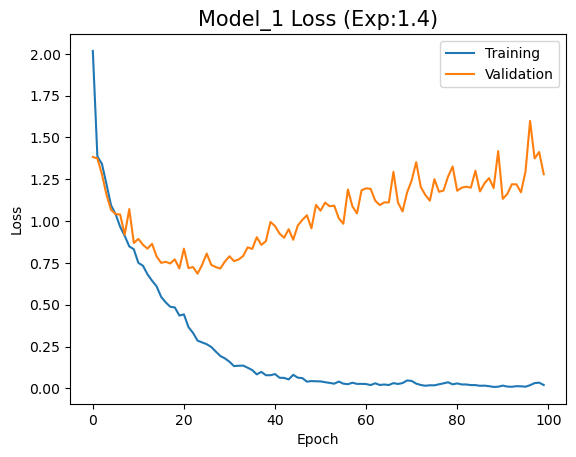

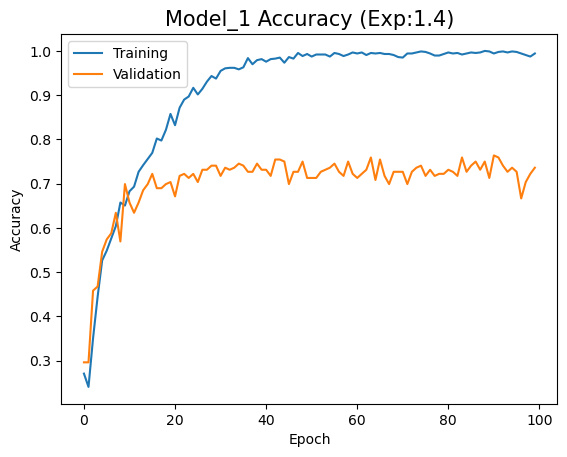

In [20]:

#Plot the training and validation loss
plt.figure()
plt.plot(history1.history['loss'], label='Training')
plt.plot(history1.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model_1 Loss (Exp:1.4)', fontsize = 15)

#Plot the training and validation Accuracy
plt.figure()
plt.plot(history1.history['accuracy'], label='Training')
plt.plot(history1.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model_1 Accuracy (Exp:1.4)', fontsize = 15)


Text(0.5, 1.0, 'Model_2 Accuracy (Exp:1.4)')

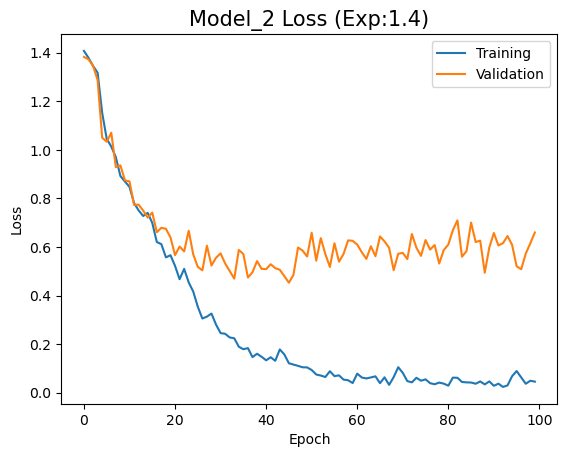

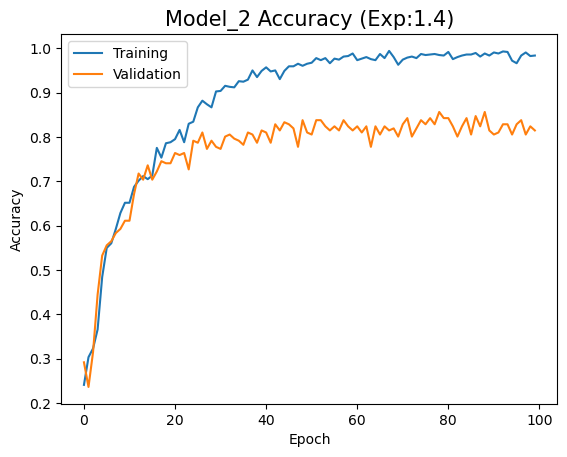

In [21]:
#Plot the training and validation loss
plt.figure()
plt.plot(history2.history['loss'], label='Training')
plt.plot(history2.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model_2 Loss (Exp:1.4)', fontsize = 15)

#Plot the training and validation Accuracy
plt.figure()
plt.plot(history2.history['accuracy'], label='Training')
plt.plot(history2.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model_2 Accuracy (Exp:1.4)', fontsize = 15)

Text(0.5, 1.0, 'Model_3 Accuracy (Exp:1.4)')

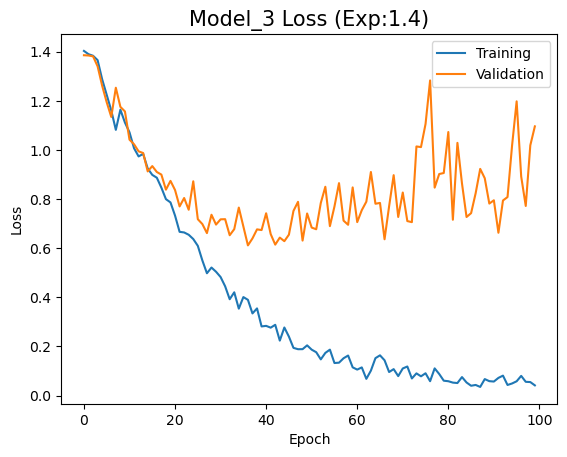

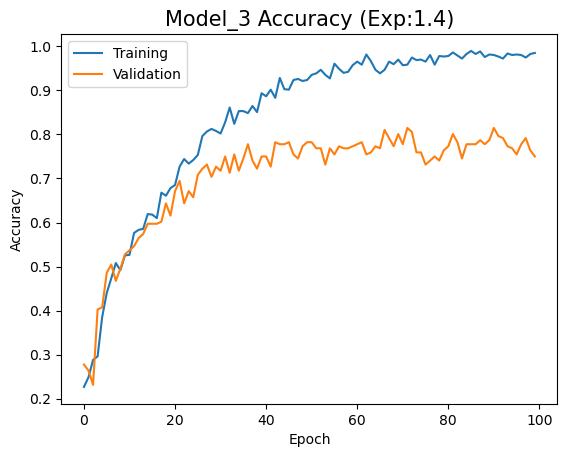

In [22]:
#Plot the training and validation loss
plt.figure()
plt.plot(history3.history['loss'], label='Training')
plt.plot(history3.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model_3 Loss (Exp:1.4)', fontsize = 15)

#Plot the training and validation Accuracy
plt.figure()
plt.plot(history3.history['accuracy'], label='Training')
plt.plot(history3.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model_3 Accuracy (Exp:1.4)', fontsize = 15)

In [23]:
# Evaluate the test result for model 1, 2, 3
Test_result1 = model_1.evaluate(test_images, test_labels, batch_size = 64)

Test_result2 = model_2.evaluate(test_images, test_labels, batch_size = 64)

Test_result3 = model_3.evaluate(test_images, test_labels, batch_size = 64)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7711 - loss: 1.2599
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7991 - loss: 0.7476
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7708 - loss: 0.7948


In [24]:
predictions1 = model_1.predict(test_images)     # Vector of probabilities
pred_label1 = np.argmax(predictions1, axis = 1) # We take the highest probability

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [25]:
predictions2 = model_2.predict(test_images)     # Vector of probabilities
pred_label2 = np.argmax(predictions2, axis = 1) # We take the highest probability

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [26]:
predictions3 = model_3.predict(test_images)     # Vector of probabilities
pred_label3 = np.argmax(predictions3, axis = 1) # We take the highest probability

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


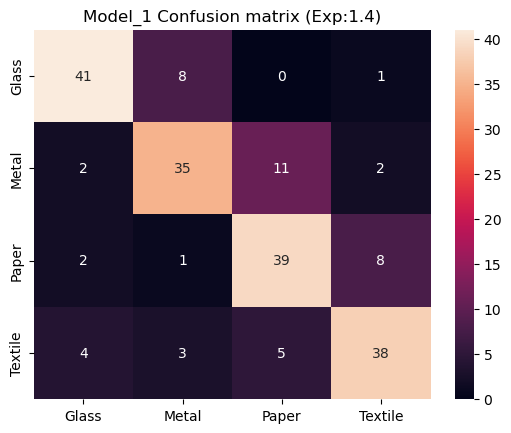

In [27]:
CM = confusion_matrix(test_labels, pred_label1)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Model_1 Confusion matrix (Exp:1.4)')
plt.show()

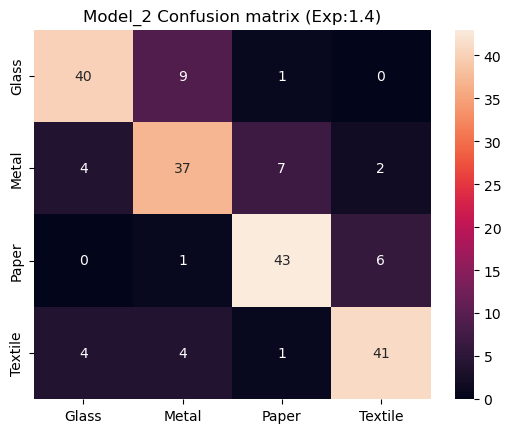

In [28]:
CM = confusion_matrix(test_labels, pred_label2)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Model_2 Confusion matrix (Exp:1.4)')
plt.show()


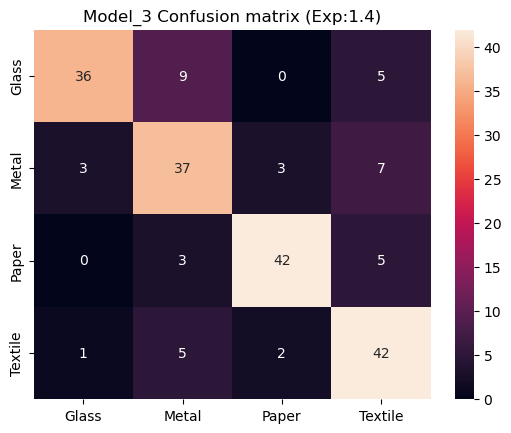

In [29]:
CM = confusion_matrix(test_labels, pred_label3)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Model_3 Confusion matrix (Exp:1.4)')
plt.show()
